# Kuramoto Sivashinsky Equation
$
u_t + u_{xxxx} + uu_x + u_{xx} = 0
$

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from utils_0 import *

In [2]:
data = sio.loadmat('DATA/kuramoto_sivishinky.mat')
u = data['u']
x = data['x'][:,0]
t = data['t'][0,:]
dt = t[1]-t[0]
dx = x[2]-x[1]
n = len(x)
m = len(t)

/tmp/ipykernel_77212/1787781242.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


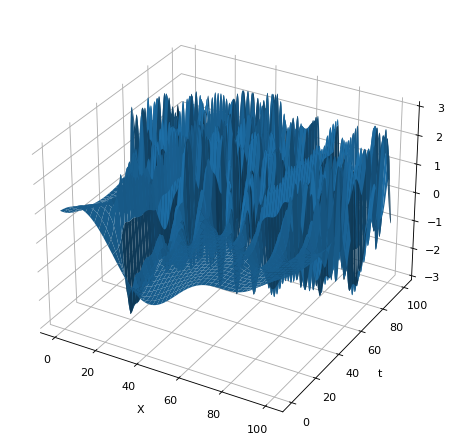

In [3]:
# plotting U field as a Surface
fig = plt.figure(figsize=(11, 7), dpi=80)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, t)
ax.plot_surface(X, Y, u.T)
# plt.title('Kuramoto Sivashinsky Equation', fontsize = 20)
plt.xlabel('X')
plt.ylabel('t');
# Get rid of colored axes planes

# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# get rid of the grid as well:
ax.grid(True)


In [4]:
Ut, R, rhs_des = build_linear_system(u, dt, dx, D=5, P=5, time_diff = 'FD', space_diff = 'FD')

### FIND-SINDy

In [5]:
lam = 10**-5
d_tol = 5
w = TrainSTRidge(R,Ut,lam,d_tol)
print_pde(w, rhs_des)

u_t = (-0.984053 +0.000000i)uu_{x}
    + (-0.993750 +0.000000i)u_{xx}
    + (-0.998328 +0.000000i)u_{xxxx}
   


In [6]:
True_theta = np.zeros(36)
True_theta[7] = -1
True_theta[12] = -1
True_theta[24] = -1

In [7]:
print('L2 Norm', np.linalg.norm(True_theta - w.reshape(-1))/np.linalg.norm(True_theta) )

L2 Norm 0.009935574961058166


## Sindy

In [8]:
dxdt = np.column_stack(( Ut ))
lam = 0.1
Xi = sindy(lam,R,dxdt)
print_pde(Xi, rhs_des)

u_t = (-0.984425 +0.000000i)uu_{x}
    + (-0.994175 +0.000000i)u_{xx}
    + (-0.998730 +0.000000i)u_{xxxx}
   


In [9]:
print('L2 Norm', np.linalg.norm(True_theta - Xi.reshape(-1))/np.linalg.norm(True_theta) )

L2 Norm 0.009628298785049406


## Variational Bayes

/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 612609.2017474795
Iteration = 1  log(Likelihood) = 612614.9456196033
Iteration = 2  log(Likelihood) = 612614.9456197717
zmean   [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
model_Index   [ 6 11 23]
Wsel   [-0.98440516 -0.99415151 -0.99870742]
Wcov   [3.36138268e-08 4.35900726e-08 3.76973681e-08]


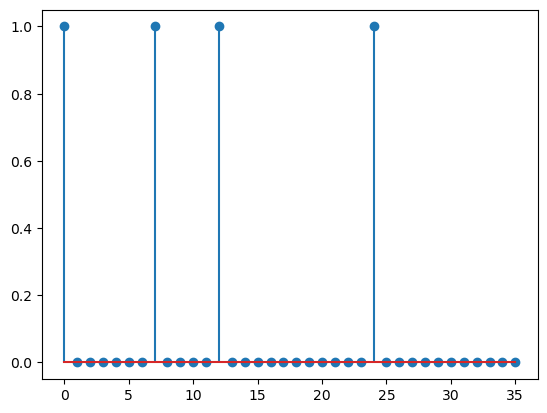

In [10]:
theta_r = initialization(w)
xdts = Ut.reshape(-1)
tol = 0.0001
pip = 0.9
verbosity = True
initz0 = theta_r
DS = Variational_Bayes_code(R, xdts, initz0, tol, pip, verbosity)

print('zmean  ',  DS['zmean'])
print('model_Index  ',DS['modelIdx'])
print('Wsel  ', DS['Wsel'])
print('Wcov  ', DS['Wcov'])
plt.stem(DS['zmean'])

plt.show()

In [11]:
np.sqrt(DS['Wcov'])

array([0.00018334, 0.00020878, 0.00019416])

In [12]:
print('Theta :',DS['Wsel'])
vb_theta = DS['wmean']
vb_theta[0] = 0
nl = R.shape[1]
zmean = DS['zmean']
zmean[0] = 0
print('VB L2 (0% noise)  :',np.linalg.norm(True_theta - vb_theta.reshape(-1))/ np.linalg.norm(True_theta) )

Theta : [-0.98440516 -0.99415151 -0.99870742]
VB L2 (0% noise)  : 0.009644937260050156


In [13]:
print_pde(vb_theta, rhs_des)

u_t = (-0.984405 +0.000000i)uu_{x}
    + (-0.994152 +0.000000i)u_{xx}
    + (-0.998707 +0.000000i)u_{xxxx}
   


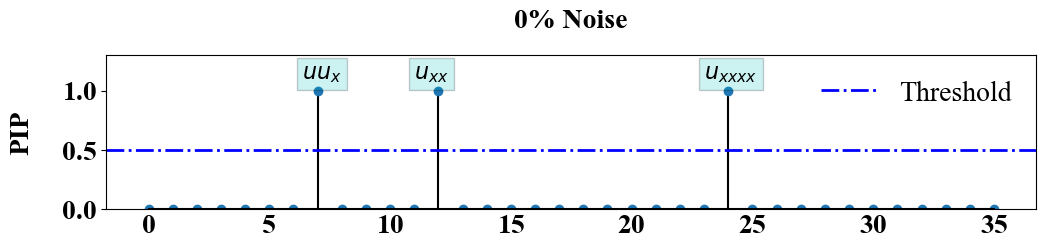

In [14]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (No noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('0% Noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(8, 1.1, "$uu_{x}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')
plt.text(11, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)
plt.text(23, 1.1, "$u_{xxxx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


### 1% noise

In [15]:
np.random.seed(0)
un = u + 0.01*np.std(u)*np.random.randn(u.shape[0],u.shape[1]) 
Utn1, Rn1, rhs_des1 = build_linear_system(un, dt, dx, D=5, P=5, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 20, width_t = 20, deg_x = 6)

### FIND-SINDy

In [16]:
wn1 = TrainSTRidge(Rn1,Utn1,10**-5,5)
print_pde(wn1, rhs_des)

u_t = (-0.489801 +0.000000i)uu_{x}
    + (-0.526409 +0.000000i)u_{xx}
    + (-0.537195 +0.000000i)u_{xxxx}
   


In [17]:
print('FIND-SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - wn1.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (1% noise)  : 0.48262479128240715


### SINDy

In [18]:
dxdt = np.column_stack(( Utn1 ))
lam = 0.1
Xi_n1 = sindy(lam,Rn1,dxdt)
print_pde(Xi_n1, rhs_des)

u_t = (-0.644315 +0.000000i)uu_{x}
    + (-0.431627 +0.000000i)u_{xx}
    + (-0.110442 +0.000000i)uu_{xxx}
    + (-0.542679 +0.000000i)u_{xxxx}
   


In [19]:
print('SINDy L2 (1% noise)  :',np.linalg.norm(True_theta - Xi_n1.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (1% noise)  : 0.4728988369915247


### Variational Bayes

In [20]:
theta_r = initialization(wn1)
xdts = Utn1.reshape(-1)
tol = 0.00001
pip = 0.9
verbosity = True
initz0 = theta_r
DS = Variational_Bayes_code(Rn1, xdts, initz0, tol, pip, verbosity)
print('zmean  ',  DS['zmean'])
print('model_Index  ',DS['modelIdx'])
print('Wsel  ', DS['Wsel'])
print('Wcov  ', DS['Wcov'])

Iteration = 0  log(Likelihood) = 109707.12031264146
Iteration = 1  log(Likelihood) = 109744.07594155606
Iteration = 2  log(Likelihood) = 109744.07594179983
zmean   [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
model_Index   [ 6 11 23]
Wsel   [-0.48954503 -0.52581111 -0.53665984]
Wcov   [1.04512967e-06 1.69319793e-06 1.42911248e-06]


In [21]:
print('Theta :',DS['Wsel'])
vb_theta_n1 = DS['wmean']
vb_theta_n1[0] = 0
zmean1 = DS['zmean']
zmean1[0] = 0
print('VB L2 (1% noise)  :',np.linalg.norm(True_theta - vb_theta_n1.reshape(-1))/np.linalg.norm(True_theta) )

Theta : [-0.48954503 -0.52581111 -0.53665984]
VB L2 (1% noise)  : 0.483081594363854


In [22]:
print_pde(vb_theta_n1, rhs_des)

u_t = (-0.489545 +0.000000i)uu_{x}
    + (-0.525811 +0.000000i)u_{xx}
    + (-0.536660 +0.000000i)u_{xxxx}
   


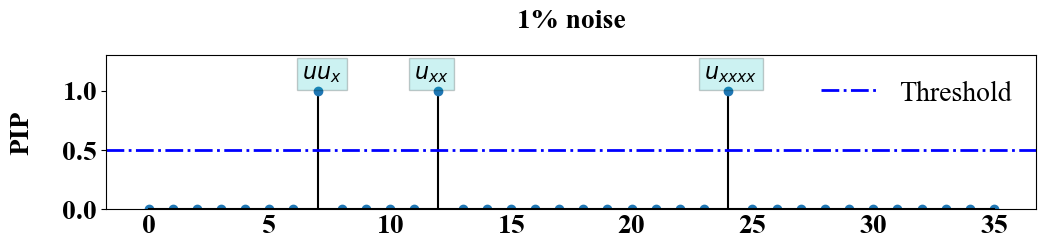

In [23]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean1, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (1% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('1% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(8, 1.1, "$uu_{x}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')
plt.text(11, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)
plt.text(23, 1.1, "$u_{xxxx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 2% Noise

In [24]:
np.random.seed(0)
un2 = u + 0.02*np.std(u)*np.random.randn(u.shape[0],u.shape[1])    
Utn2, Rn2, rhs_des2 = build_linear_system(un2, dt, dx, D=5, P=5, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 30, width_t = 30, deg_x = 6)

### FIND-SINDy

In [25]:
wn2 = TrainSTRidge(Rn2,Utn2,0.0001,500)
print("PDE derived using STRidge")
print_pde(wn2, rhs_des2)

PDE derived using STRidge
u_t = (-0.287401 +0.000000i)uu_{x}
    + (-0.389840 +0.000000i)u_{xx}
    + (-0.426172 +0.000000i)u_{xxxx}
   


In [26]:
print('FIND-SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - wn2.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (2% noise)  : 0.6349200553567652


### SINDy

In [27]:
dxdt = np.column_stack(( Utn2 ))
lam = 0.1
Xi_n2 = sindy(lam,Rn2,dxdt)
print_pde(Xi_n2, rhs_des)

u_t = (-0.485652 +0.000000i)uu_{x}
    + (-0.373911 +0.000000i)u_{xx}
    + (0.133920 +0.000000i)uu_{xxx}
    + (-0.573150 +0.000000i)u_{xxxx}
    + (0.222206 +0.000000i)uu_{xxxxx}
   


In [28]:
print('SINDy L2 (2% noise)  :',np.linalg.norm(True_theta - Xi_n2.reshape(-1))/np.linalg.norm(True_theta) )

SINDy L2 (2% noise)  : 0.5495612877333516


### Variational Bayes

In [29]:
theta_r = initialization(wn2)
xdts = Utn2.reshape(-1)
tol = 0.00001
pip = 0.9
verbosity = True
initz0 = theta_r
DS = Variational_Bayes_code(Rn2, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = 100827.30435740572
Iteration = 1  log(Likelihood) = 100863.59245701961
Iteration = 2  log(Likelihood) = 100863.5924573291
zmean [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
wmean [-1.70515119e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.87131286e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.90649987e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.26320068e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
modelId [ 6 11 23]
Wsel [-0.28713129 -0.39064999 -0.42632007]
Wcov [9.49070100e-07 2.47817442e-06 2.45556762e-06]


In [30]:
np.sqrt(DS['Wcov'])

array([0.0009742 , 0.00157422, 0.00156703])

In [31]:
print('Theta :',DS['Wsel'])
vb_theta_n2 = DS['wmean']
vb_theta_n2[0] = 0
zmean2 = DS['zmean']
zmean2[0] = 0
print('VB L2 (2% noise)  :',np.linalg.norm(True_theta - vb_theta_n2.reshape(-1))/np.linalg.norm(True_theta) )

Theta : [-0.28713129 -0.39064999 -0.42632007]
VB L2 (2% noise)  : 0.634717235440146


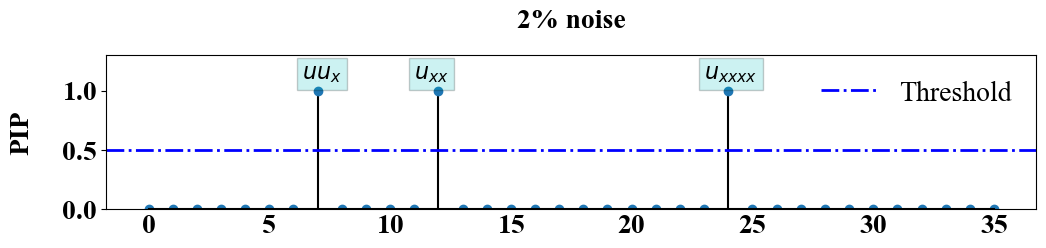

In [32]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean2, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (2% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('2% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(8, 1.1, "$uu_{x}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')
plt.text(11, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)
plt.text(23, 1.1, "$u_{xxxx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


## 5% Noise

In [33]:
np.random.seed(0)
un5 = u + 0.05*np.std(u)*np.random.randn(u.shape[0],u.shape[1])   
Utn5, Rn5, rhs_des5 = build_linear_system(un5, dt, dx, D=5, P=5, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 30, width_t = 30, deg_x = 6)

### FIND-SINDy

In [34]:
wn5 = TrainSTRidge(Rn5,Utn5,0.0001,5)
print_pde(wn5, rhs_des5)

u_t = (-0.233954 +0.000000i)uu_{x}
    + (-0.304915 +0.000000i)u_{xx}
    + (-0.334866 +0.000000i)u_{xxxx}
   


In [35]:
print('FIND-SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - wn5.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (5% noise)  : 0.7100170742259868


### SINDy

In [36]:
dxdt = np.column_stack(( Utn5 ))
lam = 0.1
Xi_n5 = sindy(lam,Rn5,dxdt)
print_pde(Xi_n5, rhs_des)

u_t = (-0.419883 +0.000000i)uu_{x}
    + (-0.248243 +0.000000i)u_{xx}
    + (-0.410190 +0.000000i)u_{xxxx}
    + (0.115837 +0.000000i)uu_{xxxxx}
   


In [37]:
print('FIND-SINDy L2 (5% noise)  :',np.linalg.norm(True_theta - Xi_n5.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (5% noise)  : 0.6488371380331789


### Variational Bayes

In [38]:
theta_r = initialization(wn5)
xdts = Utn5.reshape(-1)
tol = 0.00001
pip = 0.9
verbosity = True
initz0 = theta_r
DS = Variational_Bayes_code(Rn5, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

Iteration = 0  log(Likelihood) = 92944.41811991479
Iteration = 1  log(Likelihood) = 92982.17097659191
Iteration = 2  log(Likelihood) = 92982.1709769041
zmean [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
wmean [ 4.22494178e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.33510057e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05254828e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.34565021e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
modelId [ 6 11 23]
Wsel [-0.23351006 -0.30525483 -0.33456502]
Wcov [8.42428160e-07 2.21256073e-06 2.11337235e-06]


In [39]:
np.sqrt(DS['Wcov'])

array([0.00091784, 0.00148747, 0.00145374])

In [40]:
print('Theta :',DS['Wsel'])
vb_theta_n5 = DS['wmean']
vb_theta_n5[0] = 0
zmean5 = DS['zmean']
zmean5[0] = 0
print('VB L2 (5% noise)  :',np.linalg.norm(True_theta - vb_theta_n5.reshape(-1))/np.linalg.norm(True_theta) )

Theta : [-0.23351006 -0.30525483 -0.33456502]
VB L2 (5% noise)  : 0.7101599345527166


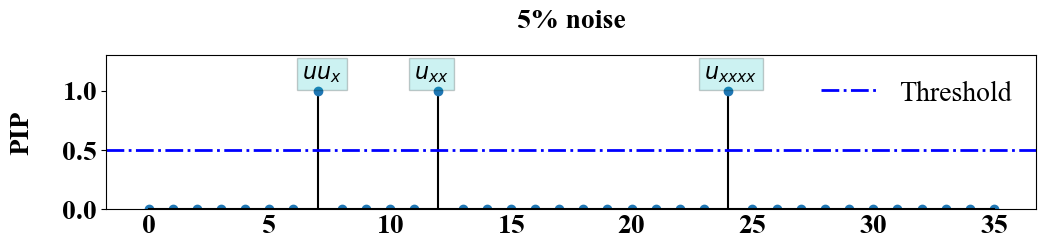

In [41]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean5, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (5% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('5% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(8, 1.1, "$uu_{x}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')
plt.text(11, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)
plt.text(23, 1.1, "$u_{xxxx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()


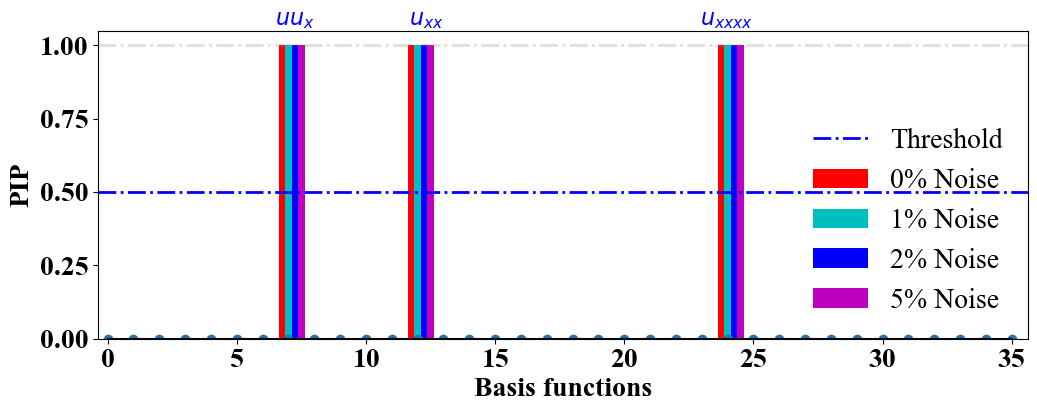

In [42]:
fig = plt.figure(figsize=(12,4))
plt.stem(xr, zmean5*0, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.bar(xr - 0.25, zmean, color = 'r', width = 0.25, label='0% Noise')
plt.bar(xr + 0.0, zmean1, color = 'c', width = 0.25, label='1% Noise')
plt.bar(xr + 0.25, zmean2, color = 'b', width = 0.25, label='2% Noise')
plt.bar(xr + 0.50, zmean5, color = 'm', width = 0.25, label='5% Noise')
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')
plt.axhline(y=1.0, color='grey', linestyle='-.', alpha=0.25, linewidth=2)

plt.xlabel('Basis functions', fontweight='bold')
plt.ylabel('PIP', fontweight='bold')
plt.grid(False)
plt.ylim(0, 1.05)

plt.xticks([0, 5, 10, 15, 20, 25, 30, 35], fontweight='bold')
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both')
plt.margins(0)

plt.text(8, 1.07, "$uu_{x}$", color='blue', fontsize=16, ha='right')
plt.text(13, 1.07, "$u_{xx}$", color='blue', fontsize=16, ha='right')
plt.text(25, 1.07, "$u_{xxxx}$", color='blue', fontsize=16, ha='right')

plt.legend(loc='lower right', ncol=1, frameon=False, fontsize=20)

plt.show()
fig.savefig('images/1D_KS_combined.pdf',format='pdf',dpi=600,bbox_inches='tight')

## 10% Noise

In [43]:
np.random.seed(0)
un10 = u + 0.10*np.std(u)*np.random.randn(u.shape[0],u.shape[1])   
Utn10, Rn10, rhs_des10 = build_linear_system(un10, dt, dx, D=5, P=5, 
                                 time_diff = 'poly', space_diff = 'poly', 
                                 width_x = 30, width_t = 30, deg_x = 6)

### FIND-SINDy

In [44]:
wn10 = TrainSTRidge(Rn10,Utn10,0.01,0.8)
print_pde(wn10, rhs_des10)

u_t = (-0.253077 +0.000000i)uu_{x}
    + (-0.100446 +0.000000i)u_{xx}
    + (-0.206005 +0.000000i)u_{xxxx}
    + (0.077188 +0.000000i)uu_{xxxxx}
   


In [45]:
print('FIND-SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - wn10.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (10% noise)  : 0.8172060310974988


### SINDy

In [46]:
dxdt = np.column_stack(( Utn10 ))
lam = 0.1
Xi_n10 = sindy(lam,Rn10,dxdt)
print_pde(Xi_n10, rhs_des)

u_t = (-0.317211 +0.000000i)uu_{x}
    + (-0.160264 +0.000000i)uu_{xxx}
    + (-0.139609 +0.000000i)u_{xxxx}
   


In [47]:
print('FIND-SINDy L2 (10% noise)  :',np.linalg.norm(True_theta - Xi_n10.reshape(-1))/np.linalg.norm(True_theta) )

FIND-SINDy L2 (10% noise)  : 0.8625847681540258


### Variational Bayes

In [48]:
theta_r = initialization(wn10)
xdts = Utn10.reshape(-1)
tol = 0.00001
pip = 0.9
verbosity = True
initz0 = theta_r
DS = Variational_Bayes_code(Rn10, xdts, initz0, tol, pip, verbosity)
print('zmean',  DS['zmean']) 
print('wmean',  DS['wmean']) 
print('modelId',  DS['modelIdx']) 
print('Wsel',  DS['Wsel']) 
print('Wcov',  DS['Wcov'])

/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:172: RuntimeWarning: overflow encountered in exp
  expitC = 1./(1 + np.exp(-C))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: divide by zero encountered in log
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:144: RuntimeWarning: invalid value encountered in multiply
  + np.nansum(zm*(np.log(p0) - np.log(zm)))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: divide by zero encountered in log
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))
/home/user/Desktop/Colaborations/Yogesh and Kalpesh/[Kalpesh]Bayes_PDE_discovery/Github/utils_0.py:145: RuntimeWarning: invalid value encountered in multiply
  + np.nansum((1-zm)*(np.log(1-p0) - np.log(1-zm))))


Iteration = 0  log(Likelihood) = 89721.80553347677
Iteration = 1  log(Likelihood) = 89760.11771742457
Iteration = 2  log(Likelihood) = 89760.11771773762
zmean [1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
wmean [ 1.75455447e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.53305042e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.00280422e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.05752515e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  7.74346089e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
modelId [ 6 11 23 30]
Wsel [-0.25330504 -0.10028042 -0.20575252  0.07743461]
Wcov [1.18304998e-06 1.74862287e-06 1.27405995e-06 3.38812726e-07]


In [49]:
np.sqrt(DS['Wcov'])

array([0.00108768, 0.00132236, 0.00112874, 0.00058208])

In [50]:
print('Theta :',DS['Wsel'])
vb_theta_n10 = DS['wmean']
vb_theta_n10[0] = 0
zmean10 = DS['zmean']
zmean10[0] = 0
print('VB L2 (10% noise)  :',np.linalg.norm(True_theta - vb_theta_n10.reshape(-1))/np.linalg.norm(True_theta) )

Theta : [-0.25330504 -0.10028042 -0.20575252  0.07743461]
VB L2 (10% noise)  : 0.8172869480769873


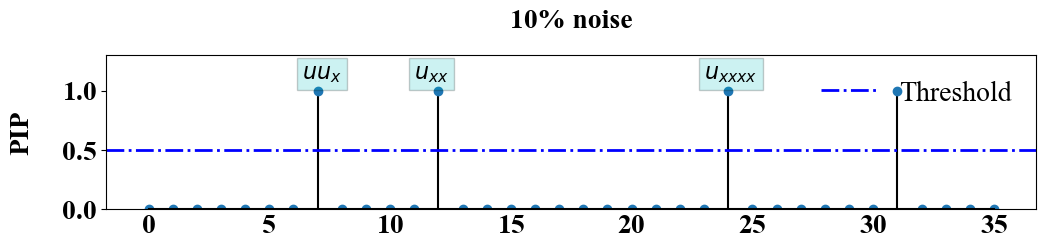

In [51]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

figure1 = plt.figure(figsize=(12, 2))
xr = np.array(range(nl))

plt.stem(xr, zmean10, linefmt='k-', markerfmt='o', basefmt='k-', use_line_collection=True)
plt.axhline(y=0.5, color='b', linestyle='-.', linewidth=2, label='Threshold')

# plt.xlabel('Basis functions (5% noise)', fontweight='bold', labelpad=20)
plt.ylabel('PIP', fontweight='bold', labelpad=20)
plt.title('10% noise', fontweight='bold', fontsize=20, pad=20)
plt.grid(False)
plt.ylim(0, 1.3)

plt.xticks(fontweight='bold')
plt.yticks([0, 0.5, 1], fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(axis='x', which='both', length=0)

plt.text(8, 1.1, "$uu_{x}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16, ha='right')
plt.text(11, 1.1, "$u_{xx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)
plt.text(23, 1.1, "$u_{xxxx}$", bbox=dict(facecolor='c', alpha=0.2), fontsize=16)

plt.legend(loc='upper right', frameon=False, fontsize=20)
plt.show()
